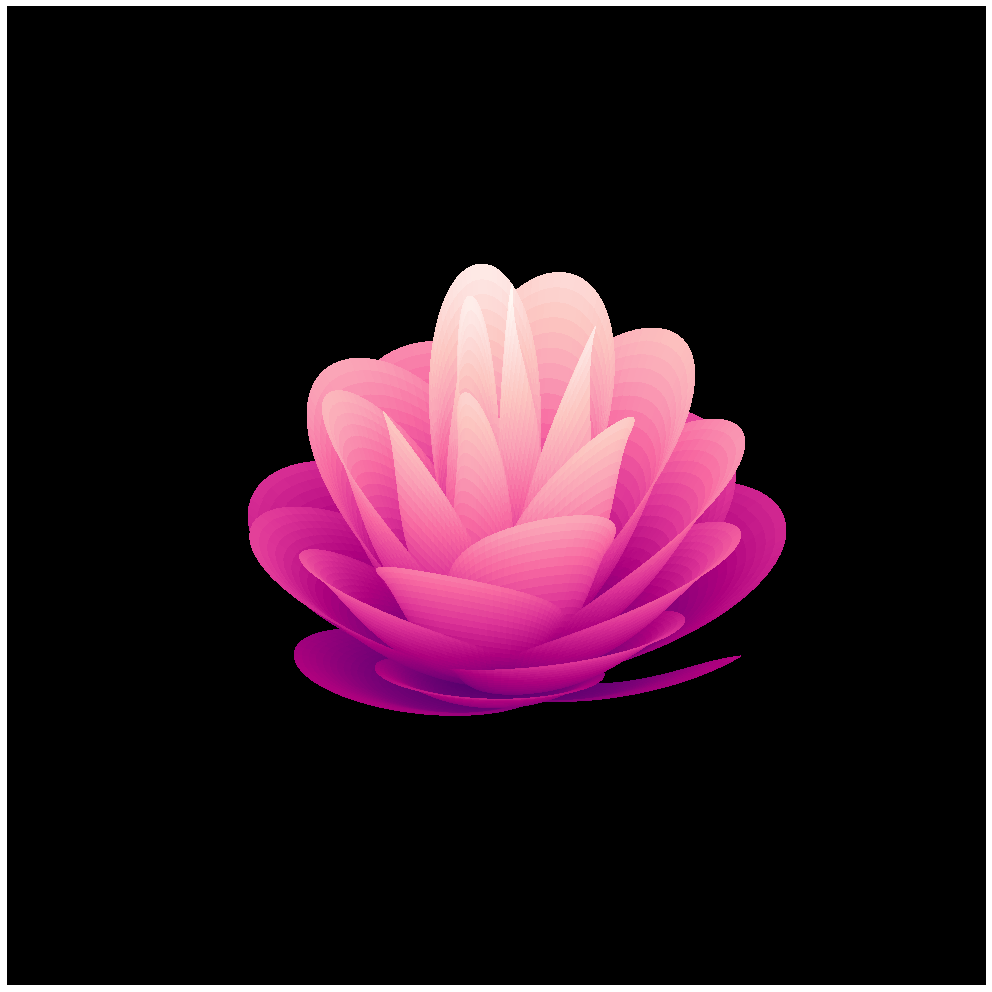

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

# Crear una figura con una proyección 3D
fig = plt.figure(figsize=(18, 18))
ax = fig.add_subplot(111, projection='3d')

# Establecer el color de fondo del gráfico
ax.set_facecolor('black')

# Desactivar los ejes
plt.axis('off')

# Generar los valores para los pétalos
x = np.linspace(0, 1, num=30)
theta = np.linspace(0, 2*np.pi, num=1200)*8
x, theta = np.meshgrid(x, theta)

# Definir la forma de los pétalos
f = 0.5*np.pi*np.exp(-theta/30)

# Agregar ruido a los pétalos para que no sean perfectamente simétricos
noise = np.sin(theta)/10

# Definir la altura de los pétalos
u = 1/2 + np.absolute(np.sin(1.65*theta))/2 + noise

# Calcular la posición de los pétalos en el plano x-y
y = 2*(x**2 - x)**2 * np.sin(f)
r = u*(x*np.cos(f) + y*np.sin(f))
h = u*(x*np.sin(f) - y*np.cos(f))

# Convertir las coordenadas polares a cartesianas
X = r * np.cos(theta)
Y = r * np.sin(theta)

# Crear la superficie tridimensional de los pétalos
surf = ax.plot_surface(X, Y, h, rstride=1, cstride=1, cmap=plt.cm.RdPu_r, antialiased=False)

In [2]:
# Definir la función de animación
def animate(i):
    # Calcular el ángulo de elevación
    if i <= 180:
        # Elevación cuando gira de 0° a 180°
        elev = 17 + 0.1*i
    else:
        # Elevación cuando gira de 180° a 360° 
        elev = 35 - 0.1*(i - 180)
    
    # Actualizar la vista de la gráfica
    ax.view_init(elev=elev, azim=i)
    return fig,

# Crear la animación
anim = animation.FuncAnimation(fig,
                               animate,
                               frames=360,
                               interval=25,
                               blit=True)

# Guardar la animación
anim.save('3D_pink_flower3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

# Mostrar la animación
HTML(anim.to_html5_video())